# Kaggle compitition Advanced House Price Predictions.
In this tutorial I have tried to use different approaches to solve the Kaggle problem.

In [1]:
%matplotlib inline

df = pd.read_csv("train.csv")
pd.options.display.max_columns = None
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 1 : To clean the data. (Remove all null or nan values, convert all categorical features)

In [2]:
df.shape

(1460, 81)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
df.drop(["PoolQC","Fence","MiscFeature","Alley"],axis=1,inplace=True)
df.shape

(1460, 77)

<IPython.core.display.Javascript object>

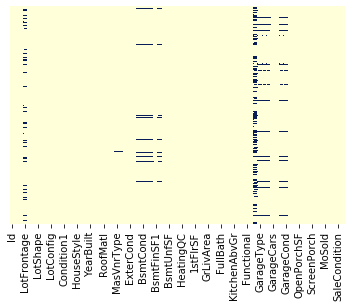

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="YlGnBu",cbar=False)

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [8]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())

In [9]:
df["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [10]:
df["MasVnrType"] = df["MasVnrType"].fillna(df["MasVnrType"].mode()[0])

In [11]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mean())

In [12]:
df["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [13]:
data_corr = df.corr()
data_corr["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.475241
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [14]:
df.drop("FireplaceQu",axis=1,inplace=True)

In [15]:
df["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [16]:
df["GarageType"] = df["GarageType"].fillna(df["GarageType"].mode()[0])

In [17]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].mean())

In [18]:
def x(columns_int):
    for col in columns_list:
        df["col"] = df["col"].fillna(df["col"].mean())
    return df

In [19]:
df["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [20]:
df["GarageFinish"] = df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])

In [21]:
df["GarageQual"] = df["GarageQual"].fillna(df["GarageQual"].mode()[0])
df["GarageCond"] = df["GarageCond"].fillna(df["GarageCond"].mode()[0])

<IPython.core.display.Javascript object>

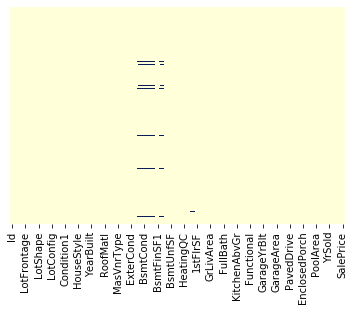

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="YlGnBu",cbar=False)

In [23]:
df.info(verbose=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [24]:
df["BsmtQual"] = df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])
df["BsmtCond"] = df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])
df["BsmtExposure"] = df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0])
df["BsmtFinType1"] = df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])
df["BsmtFinType2"] = df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])
df.info(verbose=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [25]:
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])

<IPython.core.display.Javascript object>

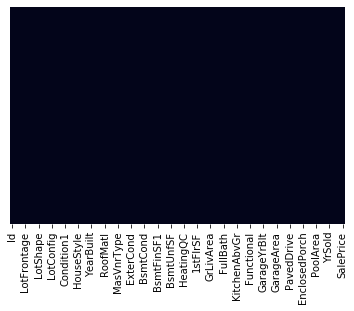

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [27]:
df_objects = df.select_dtypes(include=['object']).copy()

In [28]:
df_objects.shape

(1460, 38)

In [29]:
df_objects.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [30]:
columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(1460, 76)

In [33]:
len(columns)

38

In [34]:
test_df = pd.read_csv("finaltest.csv")
test_df.head()

<IPython.core.display.Javascript object>

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [35]:
final_df = pd.concat([df,test_df],axis=0)

<IPython.core.display.Javascript object>

C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [36]:
final_df.shape

(2919, 76)

In [37]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [38]:
final_df_hot=category_onehot_multcols(columns)

MSZoning


<IPython.core.display.Javascript object>

Street


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LotShape


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LandContour


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Utilities


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LotConfig


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LandSlope


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Neighborhood


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Condition1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Condition2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BldgType


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

HouseStyle


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RoofStyle


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RoofMatl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exterior1st


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exterior2nd


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MasVnrType


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ExterQual


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ExterCond


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Foundation


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BsmtQual


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BsmtCond


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BsmtExposure


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BsmtFinType1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BsmtFinType2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Heating


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

HeatingQC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CentralAir


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Electrical


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KitchenQual


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Functional


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GarageType


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GarageFinish


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GarageQual


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GarageCond


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PavedDrive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SaleType


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SaleCondition


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
final_df_hot.shape

(2919, 234)

In [40]:
final_df_hot =final_df_hot.loc[:,~final_df_hot.columns.duplicated()]

In [41]:
final_df_hot.shape

(2919, 178)

In [42]:
df_Train=final_df_hot.iloc[:1460,:]
df_Test=final_df_hot.iloc[1460:,:]

In [43]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [44]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Use XGB regressor as our model. The predictions with normal XGB were good but when we fine tune the hyperparameters using RandomSearchCV we get better results

In [45]:
import xgboost
clf=xgboost.XGBRegressor()
clf.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [46]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [47]:
y_pred = clf.predict(df_Test)
y_pred

array([123273.51, 152423.53, 187626.66, ..., 168481.73, 106902.15,
       225062.3 ], dtype=float32)

In [48]:
pred = pd.DataFrame(y_pred)
sub_df=pd.read_csv("sample_submission.csv")
datasets = pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv("sample_submission1.csv",index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
import xgboost
regressor=xgboost.XGBRegressor()

In [50]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
from sklearn.model_selection import RandomizedSearchCV

In [51]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=3, n_iter=20,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [52]:
random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   46.1s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  3.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=20, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbt

In [53]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [54]:
clf_new_xg=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=3, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [56]:
clf_new_xg.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [57]:
import pickle
filename = 'finalized_model_xg_para_opt.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [58]:
y_pred_new = clf_new_xg.predict(df_Test)
y_pred_new

array([123701.61, 152150.73, 176333.9 , ..., 167371.45, 121717.15,
       242946.03], dtype=float32)

In [59]:
pred_new = pd.DataFrame(y_pred_new)
sub_df=pd.read_csv("sample_submission.csv")
datasets = pd.concat([sub_df['Id'],pred_new],axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv("sample_submission_xgb_para_opt.csv",index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Next I used ANN to solve this problem, looks like with more hyper param tuning I can achieve better results.

In [61]:
X_train.shape,y_train.shape
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

Using TensorFlow backend.


In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

model = Sequential()
model.add(Dense(output_dim=50,init = 'he_uniform',activation='relu',input_dim = 177))
model.add(Dense(output_dim=25,init = 'he_uniform',activation='relu'))
model.add(Dense(output_dim=50,init = 'he_uniform',activation='relu'))
model.add(Dense(output_dim = 1, init = 'he_uniform'))
model.compile(loss= root_mean_squared_error,optimizer='Adamax')

history = model.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=177, units=50, kernel_initializer="he_uniform")`
  
C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=25, kernel_initializer="he_uniform")`
  if __name__ == '__main__':
C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\vikasbhadoria\Anaconda3\lib\site-p

Train on 1168 samples, validate on 292 samples
Epoch 1/1000
1168/1168 [==============================] - 1s 457us/step - loss: 152186.0860 - val_loss: 66866.9737
Epoch 2/1000
1168/1168 [==============================] - 0s 239us/step - loss: 64680.0033 - val_loss: 62904.6173
Epoch 3/1000
1168/1168 [==============================] - 0s 308us/step - loss: 60220.9175 - val_loss: 62114.7932
Epoch 4/1000
1168/1168 [==============================] - 0s 273us/step - loss: 57962.0814 - val_loss: 58168.9510
Epoch 5/1000
1168/1168 [==============================] - 0s 246us/step - loss: 53905.8420 - val_loss: 56035.0963
Epoch 6/1000
1168/1168 [==============================] - 0s 286us/step - loss: 51477.9651 - val_loss: 53946.4427
Epoch 7/1000
1168/1168 [==============================] - 0s 388us/step - loss: 48323.4757 - val_loss: 51521.1758
Epoch 8/1000
1168/1168 [==============================] - 0s 336us/step - loss: 44573.8595 - val_loss: 50145.9044
Epoch 9/1000
1168/1168 [================

Epoch 72/1000
1168/1168 [==============================] - 0s 214us/step - loss: 32603.0992 - val_loss: 44753.5025
Epoch 73/1000
1168/1168 [==============================] - 0s 207us/step - loss: 32536.8207 - val_loss: 44890.7966
Epoch 74/1000
1168/1168 [==============================] - 0s 205us/step - loss: 32525.7454 - val_loss: 44322.7204
Epoch 75/1000
1168/1168 [==============================] - 0s 206us/step - loss: 32384.8500 - val_loss: 46676.0254
Epoch 76/1000
1168/1168 [==============================] - 0s 215us/step - loss: 32734.7461 - val_loss: 44496.3141
Epoch 77/1000
1168/1168 [==============================] - 0s 202us/step - loss: 32348.0674 - val_loss: 44516.2051
Epoch 78/1000
1168/1168 [==============================] - 0s 200us/step - loss: 32117.9408 - val_loss: 44357.9524
Epoch 79/1000
1168/1168 [==============================] - 0s 205us/step - loss: 32191.8551 - val_loss: 44394.5109
Epoch 80/1000
1168/1168 [==============================] - 0s 214us/step - loss:

Epoch 143/1000
1168/1168 [==============================] - 0s 205us/step - loss: 30034.3267 - val_loss: 43902.9478
Epoch 144/1000
1168/1168 [==============================] - 0s 220us/step - loss: 29885.1287 - val_loss: 43690.5451
Epoch 145/1000
1168/1168 [==============================] - 0s 293us/step - loss: 30006.0743 - val_loss: 44589.0108
Epoch 146/1000
1168/1168 [==============================] - 0s 211us/step - loss: 29958.2974 - val_loss: 43814.9618
Epoch 147/1000
1168/1168 [==============================] - 0s 211us/step - loss: 29977.6074 - val_loss: 45420.4501
Epoch 148/1000
1168/1168 [==============================] - 0s 206us/step - loss: 30137.5242 - val_loss: 43869.8156
Epoch 149/1000
1168/1168 [==============================] - 0s 226us/step - loss: 29833.6368 - val_loss: 44422.8381
Epoch 150/1000
1168/1168 [==============================] - 0s 217us/step - loss: 30035.1503 - val_loss: 43612.9769
Epoch 151/1000
1168/1168 [==============================] - 0s 223us/ste

1168/1168 [==============================] - 0s 201us/step - loss: 28041.3664 - val_loss: 42840.3024
Epoch 214/1000
1168/1168 [==============================] - 0s 205us/step - loss: 27317.7455 - val_loss: 42420.2117
Epoch 215/1000
1168/1168 [==============================] - 0s 210us/step - loss: 27222.9856 - val_loss: 42980.9162
Epoch 216/1000
1168/1168 [==============================] - 0s 226us/step - loss: 27598.0218 - val_loss: 44053.2006
Epoch 217/1000
1168/1168 [==============================] - 0s 202us/step - loss: 27373.6868 - val_loss: 43328.0510
Epoch 218/1000
1168/1168 [==============================] - 0s 205us/step - loss: 27318.1320 - val_loss: 42711.1997
Epoch 219/1000
1168/1168 [==============================] - 0s 206us/step - loss: 27771.9164 - val_loss: 44032.5569
Epoch 220/1000
1168/1168 [==============================] - 0s 217us/step - loss: 27359.0745 - val_loss: 42510.4215
Epoch 221/1000
1168/1168 [==============================] - 0s 205us/step - loss: 27353

Epoch 284/1000
1168/1168 [==============================] - 0s 212us/step - loss: 24043.7890 - val_loss: 40528.8104
Epoch 285/1000
1168/1168 [==============================] - 0s 214us/step - loss: 24657.3542 - val_loss: 42024.3667
Epoch 286/1000
1168/1168 [==============================] - 0s 216us/step - loss: 24554.0881 - val_loss: 41632.2561
Epoch 287/1000
1168/1168 [==============================] - 0s 225us/step - loss: 24391.8915 - val_loss: 40193.6286
Epoch 288/1000
1168/1168 [==============================] - 0s 211us/step - loss: 24579.2057 - val_loss: 40408.6732
Epoch 289/1000
1168/1168 [==============================] - 0s 223us/step - loss: 24066.6691 - val_loss: 41709.0473
Epoch 290/1000
1168/1168 [==============================] - 0s 212us/step - loss: 24534.9274 - val_loss: 39942.2796
Epoch 291/1000
1168/1168 [==============================] - 0s 217us/step - loss: 24731.1305 - val_loss: 40237.0244
Epoch 292/1000
1168/1168 [==============================] - 0s 233us/ste

1168/1168 [==============================] - 0s 209us/step - loss: 22679.8625 - val_loss: 38994.2422
Epoch 355/1000
1168/1168 [==============================] - 0s 217us/step - loss: 23062.9767 - val_loss: 38818.6290
Epoch 356/1000
1168/1168 [==============================] - 0s 203us/step - loss: 22630.2614 - val_loss: 38767.6248
Epoch 357/1000
1168/1168 [==============================] - 0s 206us/step - loss: 22584.5398 - val_loss: 40395.2559
Epoch 358/1000
1168/1168 [==============================] - 0s 207us/step - loss: 22592.2267 - val_loss: 38646.4420
Epoch 359/1000
1168/1168 [==============================] - 0s 216us/step - loss: 23060.7619 - val_loss: 38886.7632
Epoch 360/1000
1168/1168 [==============================] - 0s 270us/step - loss: 23051.4861 - val_loss: 38579.5887
Epoch 361/1000
1168/1168 [==============================] - 0s 208us/step - loss: 23105.0537 - val_loss: 38647.2518
Epoch 362/1000
1168/1168 [==============================] - 0s 211us/step - loss: 22581

Epoch 425/1000
1168/1168 [==============================] - 0s 201us/step - loss: 22413.1286 - val_loss: 39437.2730
Epoch 426/1000
1168/1168 [==============================] - 0s 202us/step - loss: 22413.9963 - val_loss: 37510.3667
Epoch 427/1000
1168/1168 [==============================] - 0s 201us/step - loss: 21383.5193 - val_loss: 37697.8127
Epoch 428/1000
1168/1168 [==============================] - 0s 202us/step - loss: 21379.6008 - val_loss: 37197.8907
Epoch 429/1000
1168/1168 [==============================] - 0s 208us/step - loss: 21540.3107 - val_loss: 37486.3777
Epoch 430/1000
1168/1168 [==============================] - 0s 202us/step - loss: 21404.3412 - val_loss: 37632.4098
Epoch 431/1000
1168/1168 [==============================] - 0s 210us/step - loss: 21756.7227 - val_loss: 39187.4287
Epoch 432/1000
1168/1168 [==============================] - 0s 205us/step - loss: 21446.3883 - val_loss: 38333.9950
Epoch 433/1000
1168/1168 [==============================] - 0s 211us/ste

1168/1168 [==============================] - 0s 261us/step - loss: 21211.3916 - val_loss: 36674.6757
Epoch 496/1000
1168/1168 [==============================] - 0s 282us/step - loss: 21241.8185 - val_loss: 37319.9738
Epoch 497/1000
1168/1168 [==============================] - 0s 322us/step - loss: 20550.5576 - val_loss: 37188.0907
Epoch 498/1000
1168/1168 [==============================] - 0s 246us/step - loss: 21261.3576 - val_loss: 37847.2695
Epoch 499/1000
1168/1168 [==============================] - 0s 264us/step - loss: 20593.3184 - val_loss: 37485.6763
Epoch 500/1000
1168/1168 [==============================] - 0s 246us/step - loss: 20899.6201 - val_loss: 37436.8498
Epoch 501/1000
1168/1168 [==============================] - 0s 320us/step - loss: 21617.4386 - val_loss: 37999.5967
Epoch 502/1000
1168/1168 [==============================] - 0s 323us/step - loss: 20641.4694 - val_loss: 37296.8772
Epoch 503/1000
1168/1168 [==============================] - 0s 286us/step - loss: 20867

Epoch 566/1000
1168/1168 [==============================] - 0s 287us/step - loss: 19455.3412 - val_loss: 35932.9697
Epoch 567/1000
1168/1168 [==============================] - 0s 213us/step - loss: 19603.1928 - val_loss: 36614.2239
Epoch 568/1000
1168/1168 [==============================] - 0s 201us/step - loss: 19760.8357 - val_loss: 36732.7502
Epoch 569/1000
1168/1168 [==============================] - 0s 210us/step - loss: 19644.0896 - val_loss: 36091.6979
Epoch 570/1000
1168/1168 [==============================] - 0s 244us/step - loss: 19487.0007 - val_loss: 36628.7301
Epoch 571/1000
1168/1168 [==============================] - 0s 261us/step - loss: 19864.0851 - val_loss: 37027.4922
Epoch 572/1000
1168/1168 [==============================] - 0s 305us/step - loss: 19440.0904 - val_loss: 36143.1640
Epoch 573/1000
1168/1168 [==============================] - 0s 206us/step - loss: 19339.4578 - val_loss: 37088.6100
Epoch 574/1000
1168/1168 [==============================] - 0s 304us/ste

Epoch 636/1000
1168/1168 [==============================] - 0s 303us/step - loss: 18584.8102 - val_loss: 36664.1400
Epoch 637/1000
1168/1168 [==============================] - 0s 290us/step - loss: 19377.8400 - val_loss: 35625.0104
Epoch 638/1000
1168/1168 [==============================] - 0s 276us/step - loss: 18920.0873 - val_loss: 38309.5727
Epoch 639/1000
1168/1168 [==============================] - 0s 294us/step - loss: 19106.2401 - val_loss: 35915.8322
Epoch 640/1000
1168/1168 [==============================] - 0s 290us/step - loss: 19211.8428 - val_loss: 35912.1794
Epoch 641/1000
1168/1168 [==============================] - 0s 296us/step - loss: 19272.5714 - val_loss: 35583.7285
Epoch 642/1000
1168/1168 [==============================] - 0s 312us/step - loss: 18734.7092 - val_loss: 35849.9764
Epoch 643/1000
1168/1168 [==============================] - 0s 294us/step - loss: 18566.8311 - val_loss: 37969.2814
Epoch 644/1000
1168/1168 [==============================] - 0s 300us/ste

1168/1168 [==============================] - 0s 203us/step - loss: 18502.2772 - val_loss: 34694.2515
Epoch 707/1000
1168/1168 [==============================] - 0s 276us/step - loss: 18525.9686 - val_loss: 34754.8004
Epoch 708/1000
1168/1168 [==============================] - 0s 227us/step - loss: 18450.2630 - val_loss: 34704.4731
Epoch 709/1000
1168/1168 [==============================] - 0s 225us/step - loss: 17916.0576 - val_loss: 35212.8010
Epoch 710/1000
1168/1168 [==============================] - 0s 226us/step - loss: 18346.3062 - val_loss: 36060.8519
Epoch 711/1000
1168/1168 [==============================] - 0s 252us/step - loss: 18165.0640 - val_loss: 37586.9227
Epoch 712/1000
1168/1168 [==============================] - 0s 280us/step - loss: 17640.2309 - val_loss: 36220.9604
Epoch 713/1000
1168/1168 [==============================] - 0s 303us/step - loss: 18287.2038 - val_loss: 35911.0954
Epoch 714/1000
1168/1168 [==============================] - 0s 275us/step - loss: 18168

Epoch 777/1000
1168/1168 [==============================] - 0s 236us/step - loss: 17504.4585 - val_loss: 37207.1553
Epoch 778/1000
1168/1168 [==============================] - 0s 221us/step - loss: 17369.2250 - val_loss: 35399.4821
Epoch 779/1000
1168/1168 [==============================] - 0s 211us/step - loss: 17007.9615 - val_loss: 34514.7311
Epoch 780/1000
1168/1168 [==============================] - 0s 223us/step - loss: 18392.6275 - val_loss: 36244.9615
Epoch 781/1000
1168/1168 [==============================] - 0s 222us/step - loss: 18278.1522 - val_loss: 35056.1941
Epoch 782/1000
1168/1168 [==============================] - 0s 235us/step - loss: 17988.1575 - val_loss: 34483.0482
Epoch 783/1000
1168/1168 [==============================] - 0s 246us/step - loss: 17548.0957 - val_loss: 36176.7438
Epoch 784/1000
1168/1168 [==============================] - 0s 215us/step - loss: 17001.0959 - val_loss: 35530.6050
Epoch 785/1000
1168/1168 [==============================] - 0s 224us/ste

1168/1168 [==============================] - 0s 222us/step - loss: 16434.4567 - val_loss: 33922.4843
Epoch 848/1000
1168/1168 [==============================] - 0s 223us/step - loss: 16541.1288 - val_loss: 33585.9401
Epoch 849/1000
1168/1168 [==============================] - 0s 209us/step - loss: 16154.8599 - val_loss: 34371.9829
Epoch 850/1000
1168/1168 [==============================] - 0s 245us/step - loss: 16587.4803 - val_loss: 33831.4193
Epoch 851/1000
1168/1168 [==============================] - 0s 234us/step - loss: 17441.7253 - val_loss: 33389.5365
Epoch 852/1000
1168/1168 [==============================] - 0s 217us/step - loss: 17510.5628 - val_loss: 34198.2239
Epoch 853/1000
1168/1168 [==============================] - 0s 199us/step - loss: 16224.3358 - val_loss: 34274.8994
Epoch 854/1000
1168/1168 [==============================] - 0s 217us/step - loss: 16553.7725 - val_loss: 33721.0677
Epoch 855/1000
1168/1168 [==============================] - 0s 207us/step - loss: 16837

1168/1168 [==============================] - 0s 227us/step - loss: 15881.9761 - val_loss: 33915.2281
Epoch 918/1000
1168/1168 [==============================] - 0s 220us/step - loss: 15712.5647 - val_loss: 34131.4682
Epoch 919/1000
1168/1168 [==============================] - 0s 206us/step - loss: 15577.4498 - val_loss: 32857.9016
Epoch 920/1000
1168/1168 [==============================] - 0s 216us/step - loss: 16288.1482 - val_loss: 34496.3111
Epoch 921/1000
1168/1168 [==============================] - 0s 230us/step - loss: 17005.1444 - val_loss: 33429.2818
Epoch 922/1000
1168/1168 [==============================] - 0s 209us/step - loss: 16035.9459 - val_loss: 33715.2359
Epoch 923/1000
1168/1168 [==============================] - 0s 216us/step - loss: 16077.4469 - val_loss: 35256.7007
Epoch 924/1000
1168/1168 [==============================] - 0s 213us/step - loss: 16073.2591 - val_loss: 34569.9145
Epoch 925/1000
1168/1168 [==============================] - 0s 225us/step - loss: 16746

Epoch 988/1000
1168/1168 [==============================] - 0s 218us/step - loss: 16140.2986 - val_loss: 33021.6499
Epoch 989/1000
1168/1168 [==============================] - 0s 218us/step - loss: 15235.1522 - val_loss: 33270.0187
Epoch 990/1000
1168/1168 [==============================] - 0s 218us/step - loss: 15370.2374 - val_loss: 32649.6444
Epoch 991/1000
1168/1168 [==============================] - 0s 216us/step - loss: 14992.1225 - val_loss: 33783.3273
Epoch 992/1000
1168/1168 [==============================] - 0s 240us/step - loss: 15879.4463 - val_loss: 33726.8900
Epoch 993/1000
1168/1168 [==============================] - 0s 221us/step - loss: 15481.2711 - val_loss: 33458.0806
Epoch 994/1000
1168/1168 [==============================] - 0s 224us/step - loss: 15374.2581 - val_loss: 35188.7258
Epoch 995/1000
1168/1168 [==============================] - 0s 212us/step - loss: 16106.1899 - val_loss: 32665.7150
Epoch 996/1000
1168/1168 [==============================] - 0s 221us/ste

In [64]:
ann_pred=model.predict(df_Test)
ann_pred

array([[134514.28],
       [176172.44],
       [189711.05],
       ...,
       [229926.75],
       [151546.9 ],
       [242013.89]], dtype=float32)

In [65]:
pred_new_ann = pd.DataFrame(ann_pred)
sub_df=pd.read_csv("sample_submission.csv")
datasets = pd.concat([sub_df['Id'],pred_new_ann],axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv("sample_submission_ann.csv",index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## I got a good rank in kaggle. My rank was 2259 out of 4900. Which is good considering I spent only half a day to build this. For sure with more efforts I can get into top 200 ranks. Still a lot can be done as of now I have not even done feature selections. That will help!!